<font size="5">Analysis of Mental Health in the IT Industry

<font size="2">This Jupyter notebook aims to explore and analyze a dataset related to mental health within the Information Technology (IT) industry. With the increasing demands of the tech sector, concerns regarding mental well-being have gained significant attention. This analysis seeks to understand key factors affecting mental health, identify trends, and provide insights that could help improve mental health awareness and support within the industry.

<font size="4">Objectives

<font size="2">- Giving an overview of the respondents of the survey, while identifying the sample size, sociodemographic features and if any sampling bias

<font size="2">-Performing exploratory data analysis

<font size="2">-Calculating the prevalence rate of three most spread mental diseases



<font size="4"> Dataset and Notebook introduction

<font size="2"> This data is from Open Source Mental Illness (OSMI) using survey data from years 2014, 2016, 2017, 2018 and 2019. Each survey measures and attitudes towards mental health and frequency of mental health disorders in the tech workplace.
The raw data was processed using Python and SQL, whose SQLite database contains 3 tables: Survey, Question, and Answer.

<font size="4">Load the dataset

In [885]:
# import libraries
import pandas as pd
import numpy as np
import sqlite3 as sql
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", 200)

# create a connector for sql dataset
con = sql.connect("mental_health.sqlite")

<font size="4"> Reviewing the Question table

<font size="2"> From the Kaggle description of the dataset, we were able to understand the type of data available within each table. This gave us clarity on how to approach the analysis by identifying the relevant fields and relationships between tables.

In [886]:
# query creation
query = """ 
        SELECT questiontext Question
        FROM Question
        """
# Execute query and load into DataFrame
questions = pd.read_sql(query, con)

print(questions.value_counts())

Question                                                                                                                                                                                                                        
Any additional notes or comments                                                                                                                                                                                                    1
Are you openly identified at work as a person with a mental health issue?                                                                                                                                                           1
Are you self-employed?                                                                                                                                                                                                              1
Briefly describe what you think the industry as a whole and/or employers could do to 

<font size="2">As a first step, we thoroughly reviewed the questions within the dataset. Upon this initial review, several observations were made:

- Redundancy of Topics
- Lack of Topic Ordering

Given the large volume of questions, it became clear that a comprehensive review of every question would be a time-consuming process. Therefore, we decided to focus only on a subset of questions. This subset was selected by identifying key macro-topics that align with our primary research objectives, allowing us to proceed with a more focused and efficient analysis.

<font size="3"> Reviewing the Answer table

<font size="2"> Before proceeding with deeper analysis of the Answer table, it's essential to first perform a quantitative review. This step allows us to understand the structure of the data, specifically the distribution of answers across different questions.

In [887]:
query = """ 
        SELECT COUNT(AnswerText) Answers
        FROM Answer
        GROUP BY QuestionID
        """
# Execute query and load into DataFrame
answers = pd.read_sql(query, con)

print(answers.value_counts())

Answers
1525       33
2958       31
1260       12
4218       12
1433       12
2693        2
1793        1
2072        1
2692        1
Name: count, dtype: int64


<font size="2"> During the quantitative review, we observed that not every question has the same number of answers. This discrepancy may arise due to various factors, such as incomplete survey responses or optional questions within the survey. 
Such trend should be investigated, to understand if some of the question were asked in different years or if any other aspect affected the number of responses

<font size="4"> Sociodemographic features analysis

<font size="2">As part of our analysis, we focused on several key sociodemographic features to understand the underlying trends within the dataset. The features analyzed include: Gender, Race, Age and Geographical Location

<font size="4"> Gender

<font size="2">To ensure a comparable sample for our analysis, the first plot focuses solely on individuals who identified as female or male. This decision was made because we were uncertain about how to categorize non-binary or transgender individuals in a way that would be both meaningful and accurate within the context of our analysis.

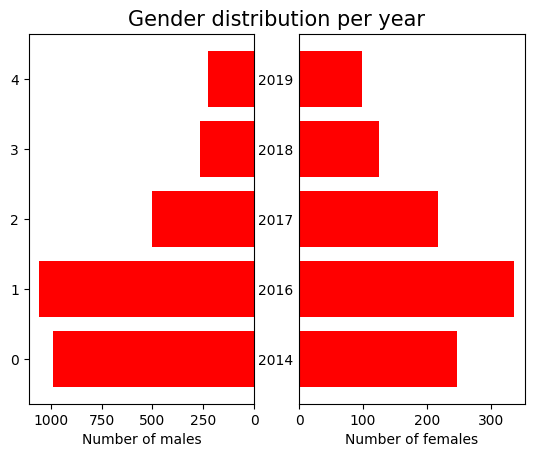

In [888]:
query = """
SELECT SurveyID,
       SUM(CASE WHEN AnswerText = 'male' OR AnswerText = 'Male' OR AnswerText = 'MALE' THEN 1 ELSE 0 END) AS male_count,
       SUM(CASE WHEN AnswerText = 'female' OR AnswerText = 'Female' OR AnswerText = 'FEMALE'THEN 1 ELSE 0 END) AS female_count
FROM Answer
WHERE     QuestionID == 2
GROUP BY SurveyID
"""
gender = pd.read_sql(query, con)

gender
# Execute query and load into DataFrame
position = np.arange(len(gender))

# setting the plot
fig, (ax_left, ax_right) = plt.subplots(ncols=2)

# setting the axes
ax_left.barh(position, gender["male_count"], align="center", facecolor="red")
ax_left.invert_xaxis()
ax_left.set_xlabel("Number of males")
ax_right.barh(position, gender["female_count"], align="center", facecolor="red")
ax_right.set_yticks(position)
ax_right.set_yticklabels(gender["SurveyID"].values, ha="center", x=-0.06)
ax_right.set_xlabel("Number of females")

# setting the labels
plt.title("Gender distribution per year", fontsize=15, x=-0.1)
plt.tick_params(left=False)
plt.show()

<font size="2"> In reviewing the dataset, we observed notable trends in the percentage of male and female responses over the years:

- Between 2014 and 2016, both male and female responses showed an increase.
- In the years following 2016, we noticed that female responses began to slightly outnumber male responses.

This shift raises questions about the potential factors influencing gender representation in the dataset. An interesting direction for further analysis could involve investigating if any specific phenomena impacted recruitment practices or if there were changes in the distribution or accessibility of the questionnaire that may have influenced gender participation.

<font size="2"> For a comprehensive analysis, also transgender and non-binary individuals have been calculated, to have a general overview of the population

In [889]:
query = """
SELECT AnswerText Trans_gender, COUNT(AnswerText) Trans_count
FROM Answer
WHERE  QuestionID == 2
GROUP BY Trans_gender
"""
# Execute query and load into DataFrame
gender = pd.read_sql(query, con)

trans = gender.loc[gender["Trans_gender"].str.contains("Trans|trans|TRANS")]

print(trans)

                    Trans_gender  Trans_count
5            Agender trans woman            1
16                Female (trans)            2
37             Male (trans, FtM)            1
52           Other/Transfeminine            1
57                  Trans female            1
58                     Trans man            2
59  Trans non-binary/genderfluid            1
60                   Trans woman            2
61                  Trans-female            1
62                 Transfeminine            1
63             Transgender woman            1
64             Transitioned, M2F            1
98                   trans woman            1
99                   transgender            1


In [890]:
query = """
SELECT AnswerText Non_binary, COUNT(AnswerText) Non_binary_count
FROM Answer
WHERE  QuestionID == 2
GROUP BY Non_binary
"""
# Execute query and load into DataFrame
gender = pd.read_sql(query, con)

non_binary = gender.loc[gender["Non_binary"].str.contains("Binary|BINARY|binary")]

print(non_binary)

                      Non_binary  Non_binary_count
21     Female/gender non-binary.                 1
28        Genderqueer/non-binary                 1
44                    Non binary                 2
45                    Non-binary                 3
46   Non-binary and gender fluid                 1
47                     Nonbinary                 8
48               Nonbinary/femme                 1
59  Trans non-binary/genderfluid                 1
86                    non binary                 1
87                    non-binary                 6
88                     nonbinary                 1


<font size="2"> Although non-binary and transgender individuals were included in the dataset, they represented a minority. We calculated their proportion in the dataset, and while their inclusion is important, we believe that their smaller sample size would not have a significant impact on the overall visualization of results. However, future analysis may involve a more nuanced approach to better include these groups in the findings.

<font size="4">Age Analysis of Respondents

<font size="2">For this analysis, we focused on the age distribution of survey respondents. The age range was specifically limited to individuals between 17 and 70 years old, which likely reflects the active, employed population in the workforce. This range allows us to analyze age-related trends without the influence of outliers that might fall outside the typical employment age.

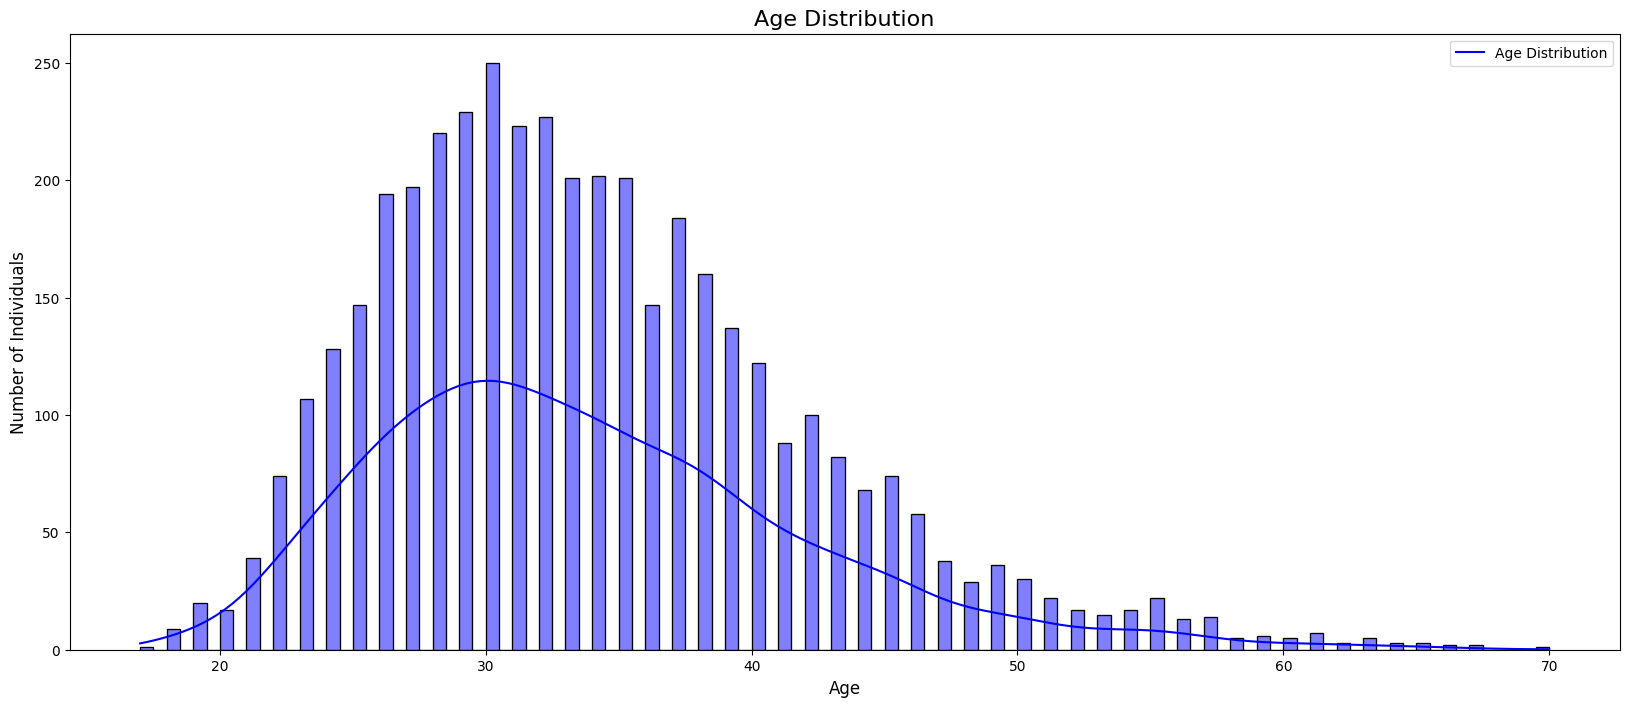

In [891]:
query = """
    SELECT CAST(AnswerText AS INTEGER) AS Age 
    FROM Answer
    WHERE QuestionID = 1 AND CAST(AnswerText AS INTEGER) BETWEEN 17 AND 70
    ORDER BY Age
"""

# Execute query and load into DataFrame
age_distinct = pd.read_sql(query, con)

# Plotting age distribution
plt.figure(figsize=(20, 8))

sns.histplot(data=age_distinct, x="Age", kde=True, binwidth=0.5, color="blue")

# Adding labels and title
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Individuals", fontsize=12)
plt.title("Age Distribution", fontsize=16)

# Adding legend
plt.legend(["Age Distribution"])

plt.show()

<font size="2"> From the age distribution analysis, we observed that the peak of employees falls within the age group of those in their 30s. This age group appears to represent the largest proportion of respondents, suggesting that a significant portion of the workforce is comprised of individuals in this stage of their careers.

Additionally, there is a noticeable upsurge in younger individuals (those in their early 20s), indicating a possible trend of increased interest and consistent hiring of younger generations within the industry.

<font size = "4">Geographic Area Analysis

<font size="2">A similar approach was taken to analyze the geographic distribution of respondents. To facilitate a clearer understanding of the results, we grouped respondents by continent, categorizing each country into its respective region. This method provides a more manageable view of the data by enabling us to observe patterns and trends at a continental level, rather than on a per-country basis.

                     Country  Count                             Geo_Area
1   United States of America   2604                        North America
2             United Kingdom    482                Europe / Central Asia
3                     Canada    199                        North America
4                    Germany    136                Europe / Central Asia
5                Netherlands     98                Europe / Central Asia
6                  Australia     73                       Asia / Oceania
7                    Ireland     51                Europe / Central Asia
8                     France     51                Europe / Central Asia
9                      India     50                       Asia / Oceania
10                    Brazil     37                        South America
11                    Sweden     29                Europe / Central Asia
12               Switzerland     28                Europe / Central Asia
13                     Spain     26                

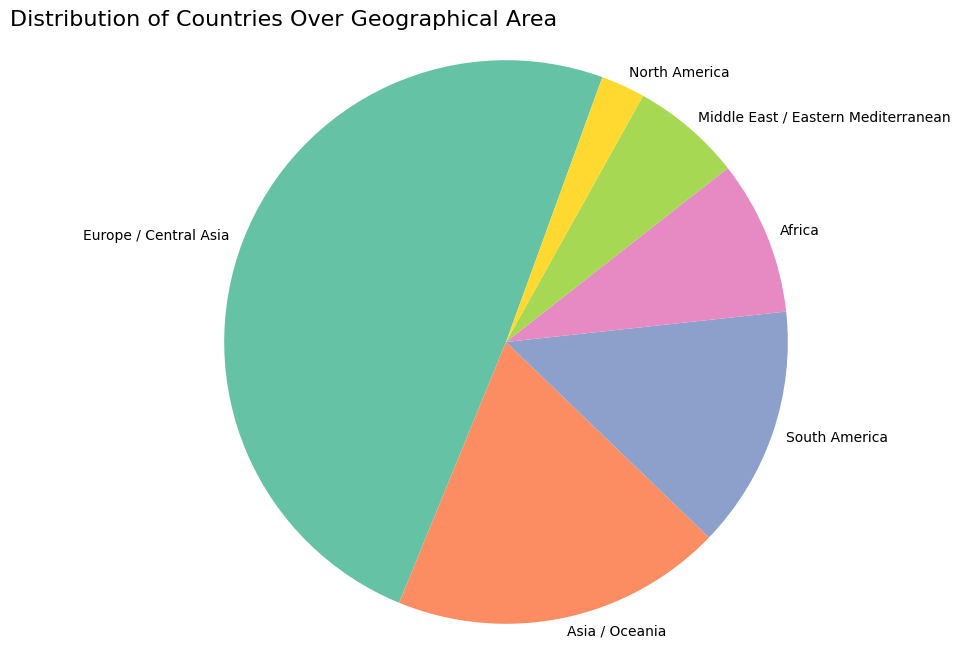

In [892]:
query = """
        SELECT 
    AnswerText AS Country, 
    COUNT(AnswerText) AS Count,  
    CASE
        WHEN AnswerText = 'United States of America' OR AnswerText = 'Canada' THEN 'North America'
        WHEN AnswerText IN ('Bahamas, The', 'Ecuador', 'Guatemala', 'Venezuela', 'Costa Rica', 
                            'Uruguay', 'Chile', 'Argentina', 'Colombia', 'Brazil', 'Mexico') 
        THEN 'South America'
        WHEN AnswerText IN ('South Africa', 'Nigeria', 'Algeria', 'Zimbabwe', 'Kenya', 
                            'Ghana', 'Ethiopia') 
        THEN 'Africa'
        WHEN AnswerText IN ('Iran', 'Jordan', 'Saudi Arabia', 'Pakistan', 'Israel') 
        THEN 'Middle East / Eastern Mediterranean'
        WHEN AnswerText IN ('Brunei', 'Mauritius', 'Philippines', 'Taiwan', 'Thailand', 'Vietnam', 
                            'China', 'Hong Kong', 'Bangladesh', 'Indonesia', 'Singapore', 
                            'Japan', 'New Zealand', 'India', 'Australia') 
        THEN 'Asia / Oceania'
        ELSE 'Europe / Central Asia' 
    END AS Geo_Area
FROM Answer
WHERE QuestionID = 3
GROUP BY Country
ORDER BY Count DESC;
"""
# Execute query and load into DataFrame
nation = pd.read_sql(query, con)

nation.columns = ["Country", "Count", "Geo_Area"]

# calculating the response only for UD citizens
US_citizens = int(nation["Count"].loc[0]) + int(nation["Count"].loc[1])
nation.loc[1] = ["United States of America", US_citizens, "North America"]
nation.drop(index=[0, 59], inplace=True)

# printing the countries summary
print(nation)

geo_area_counts = nation["Geo_Area"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    geo_area_counts,
    labels=geo_area_counts.index,
    startangle=70,
    colors=sns.color_palette("Set2"),
    labeldistance=1.05,
)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(
    "Distribution of Countries Over Geographical Area", loc="left", x=-0.3, fontsize=16
)
plt.axis("equal")

# Show the plot
plt.show()

<font size = "2"> In examining the geographic distribution of respondents, we observed that while Europe has the highest number of countries represented in the dataset, the majority of responses come from American respondents. This creates a potential bias in the overall results, as the findings may predominantly reflect the experiences and perspectives of individuals in America.

Additionally, the lower representation from Middle Eastern and African countries raises some important questions:

Survey Distribution: It’s unclear whether the questionnaire was adequately distributed in these regions, or if there were barriers to access that limited participation.
IT Industry Representation: Another possibility is that these regions may have a lower proportion of IT employees, which could naturally lead to fewer responses.
This geographic skew suggests that the results might not fully capture the global diversity of perspectives in the IT industry. Consequently, while our findings offer valuable insights, they may primarily reflect trends relevant to American respondents.

<font size = "4">Race Analysis and Observed Bias

<font size = "2">In analyzing the racial distribution of respondents, we identified a strong bias in the dataset: the majority of responses are from individuals who identify as White. This concentration suggests that the perspectives represented in the data may not fully capture the experiences of racial minorities.

Another notable finding was the significant proportion of responses marked as "Not responded." This non-response could reflect a refusal to answer or potentially a struggle in self-identifying with a specific racial category. Investigating the reasons behind this non-response rate could provide deeper insights into respondents’ comfort with racial categorization or possible limitations in how racial data was collected.

Overall, this racial distribution indicates a biased sample, with limited representation from minority groups such as African American, Asian, and Hispanic individuals—especially when considering the demographic diversity of the American population. This skew highlights the need to interpret results with caution, as they may predominantly reflect the views and experiences of the racial majority, rather than providing a comprehensive view of the IT industry as a whole.

                         Race  Responses
0                       White        873
1               Not responded        566
2  More than one of the above         35
3                       Asian         31
5   Black or African American         15


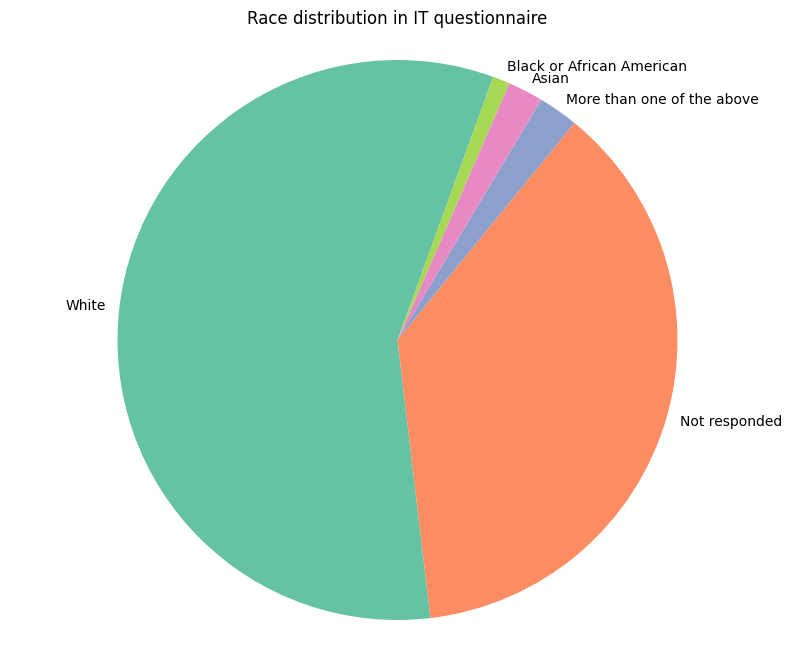

In [893]:
query = """
        SELECT AnswerText Race, COUNT(AnswerText) Responses
        FROM Answer
        WHERE QuestionID = 89
        GROUP BY AnswerText
        ORDER BY COUNT(AnswerText) DESC
        LIMIT 6
        """
# Execute query and load into DataFrame
race = pd.read_sql(query, con)

# stacking together the not-responded
no_response_count = race["Responses"].loc[1] + race["Responses"].loc[4]
race.loc[1] = ["Not responded", no_response_count]
race = race.drop(index=4)

print(race)

# setting plot
plt.figure(figsize=(10, 8))

# plot pie chart
plt.pie(
    race["Responses"],
    labels=race["Race"],
    startangle=70,
    colors=sns.color_palette("Set2"),
    labeldistance=1.05,
)

plt.title("Race distribution in IT questionnaire")

plt.axis("equal")

plt.show()

<font size = "4"> US States

<font size = "2">As mostly of the responses were coming from the US, the number of US countrie were listed. As showed, the questionnaire represents fairly most of all the UD states. The smaller number of IT employees in some of these, might be the intended a different need in IT industry.


In [894]:
query = """
        SELECT AnswerText US_Country, COUNT(AnswerText) Number_of_responses
        FROM Answer
        WHERE QuestionID = 4
        GROUP BY AnswerText
        ORDER BY COUNT(AnswerText) DESC
        LIMIT 10
        """
# Execute query and load into DataFrame
us_state = pd.read_sql(query, con)

us_state.drop(index=0)

,US_Country,Number_of_responses
1,California,382
2,Illinois,223
3,Washington,168
4,New York,146
5,Tennessee,121
6,Texas,119
7,Ohio,109
8,Michigan,108
9,Minnesota,101


<font size="4">Analysis of Mental Health Conditions in the Family

<font size="2">In this section, we analyze responses related to mental health conditions within respondents' families. To gain a clear understanding of how family mental health concerns may vary over time, we calculated the frequency of different responses for each year of the survey. Responses were categorized into three distinct groups:

- "Yes": Respondents who indicated a known mental health condition within their family.

- "No": Respondents who reported no known mental health condition in their family.

- "I don't know": Respondents uncertain about the presence of mental health conditions in their family.

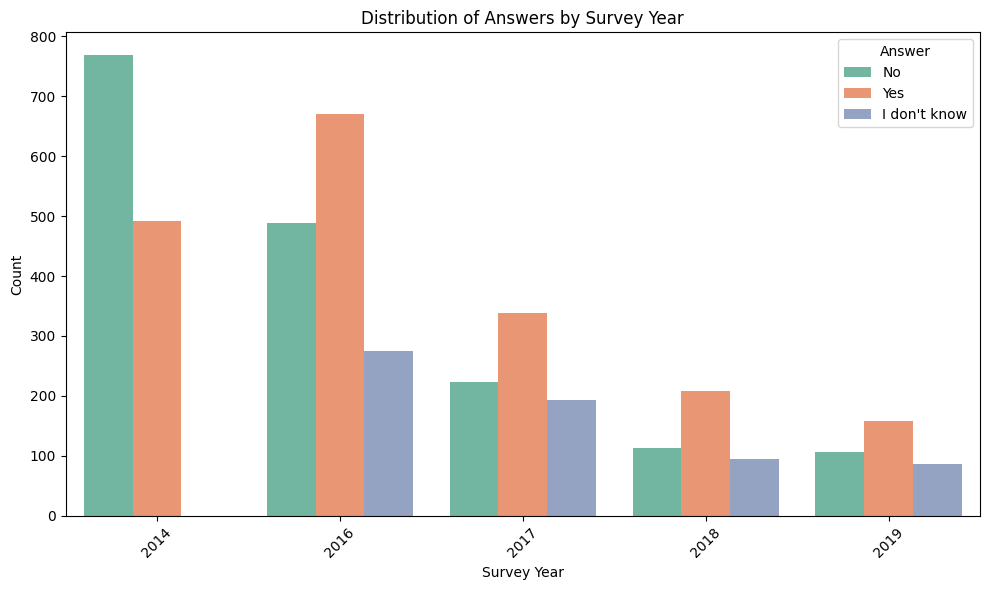

In [895]:
# setting plot figure
plt.figure(figsize=(10, 6))

# plotting using seaborn
sns.countplot(data=family_mental_health, x="Survey_Year", hue="Answer", palette="Set2")

# setting the labels
plt.title("Distribution of Answers by Survey Year")
plt.xlabel("Survey Year")
plt.ylabel("Count")

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<font size="2"> In analyzing responses over the years, we noticed a higher volume of responses during the two most active survey years, 2014 and 2016. Despite these peaks, the proportion between the different types of answers ("Yes," "No," "I don't know") has remained relatively consistent across the years surveyed.

A particularly notable finding is the significant number of respondents who reported having family members with mental health conditions. This consistency suggests a stable awareness or openness among respondents in acknowledging mental health conditions within their families, indicating that family mental health challenges are a commonly recognized concern among the IT industry respondents.

<font size = "4">Analysis of Mental Health Resources in the IT Industry

<font size = "2">This section focuses on the resources and support systems provided within the IT industry to address mental health. To understand how mental health is supported and perceived in the workplace, we analyzed responses to three key questions:

Anonymity in Reporting: Whether employees felt they could report a mental health condition anonymously.
Availability of Mental Health Resources: Whether mental health resources were accessible to employees within the organization.
Comfort in Reporting to a Supervisor: Whether employees felt comfortable reporting a mental health condition to their direct supervisor.
For each question, responses were categorized according to specific answers, allowing us to examine patterns in support and openness around mental health in the workplace. This breakdown provides insights into employees’ comfort and the perceived adequacy of resources, as well as the degree of confidentiality provided when discussing mental health issues.

Text(0.5, 1.0, 'Mental Health on Workplace')

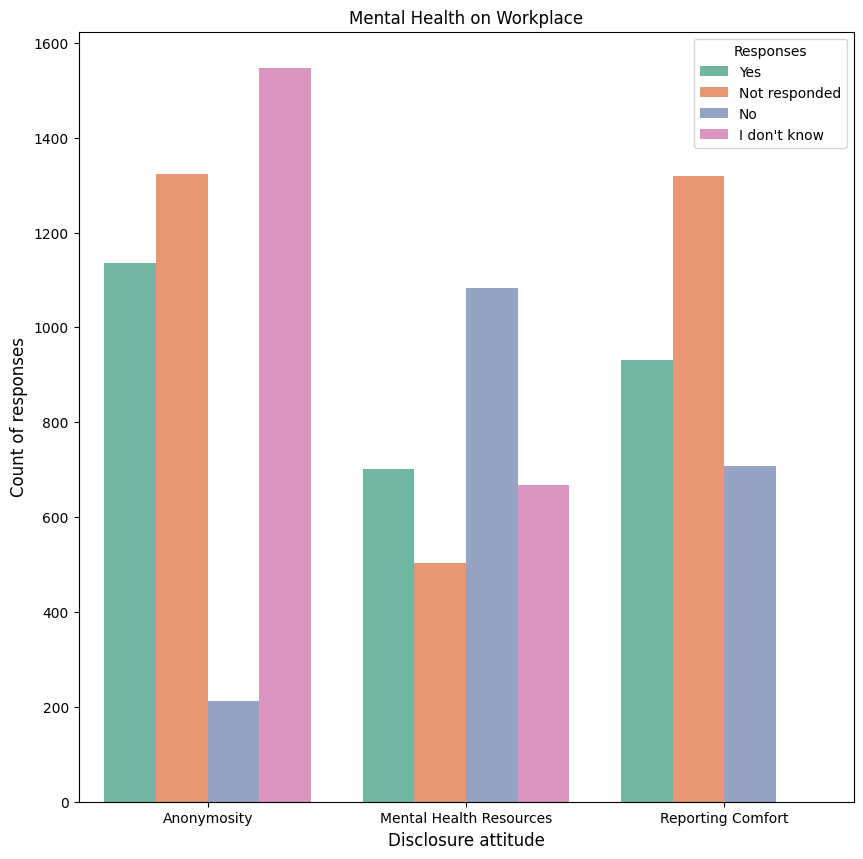

In [896]:
query = """
           SELECT a.AnswerText, a.QuestionID, q.questionid,q.questiontext,
           CASE
              WHEN AnswerText = "Yes" THEN "Yes"
              WHEN AnswerText = "No" THEN "No"
              WHEN AnswerText = "I don't know" OR "Don't know" THEN "I don't know"
              ELSE "Not responded" END AS Responses
              FROM Answer a
              JOIN Question q
              ON a.QuestionID = q.questionid
              WHERE (a.QuestionID = 11 OR a.QuestionID = 16 OR a.QuestionID = 19)
        """
# Execute query and load into DataFrame
question_response = pd.read_sql(query, con)

# replacing questionid for related mental conditions
question_response["questionid"] = question_response["questionid"].replace(
    [11, 16, 19], ["Anonymosity", "Mental Health Resources", "Reporting Comfort"]
)

# setting the plot figure
plt.figure(figsize=(10, 10))

# plotting using seaborn
sns.countplot(data=question_response, x="questionid", hue="Responses", palette="Set2")

# setting the label
plt.ylabel("Count of responses", loc="center", fontsize=12)
plt.xlabel("Disclosure attitude", loc="center", fontsize=12)
plt.title("Mental Health on Workplace")

<font size = "2"> The results of our analysis reveal that a significant number of respondents are not aware of the processes for reporting mental health issues. This lack of awareness leads us to assume that many of these individuals may not be experiencing any mental health conditions themselves.

Furthermore, this finding partially correlates with the insights gained from the "Mental Health Resources" section, where the highest proportion of respondents indicated they were unaware of any resources provided by their employers for mental health support. This suggests a gap in communication or education regarding available mental health resources within the workplace.

In contrast, the data indicates that the remaining respondents generally feel comfortable reporting mental health conditions, which may be attributed to the anonymity of feedback mechanisms in place. This comfort could encourage individuals to seek help or disclose their mental health status without fear of stigma or repercussions.

Overall, these findings underscore the importance of improving awareness of reporting processes and resources, as well as fostering a supportive environment that encourages open dialogue about mental health in the IT industry.

<font size = "4">Frequency Analysis of Mental Conditions

<font size = "2">In this section, we conduct a frequency analysis of the reported mental conditions among respondents. Our primary objective is to identify and quantify the three most common mental health conditions reported in the dataset.

To achieve this, we counted the number of cases associated with each condition, enabling us to determine the prevalence of specific mental health issues within the IT industry. This analysis provides valuable insights into which mental conditions are most frequently encountered, highlighting areas that may require increased awareness and resources for support.

In [897]:
query = """
        SELECT AnswerText AS condition, COUNT(AnswerText) AS count
        FROM Answer
        WHERE QuestionID = 115
        GROUP BY condition
        ORDER BY count DESC
        LIMIT 4
        """
# Execute query and load into DataFrame
mental_condition = pd.read_sql(query, con)

# calculating total population
total_population = np.sum(mental_condition["count"])

# setting clinical conditions
mental_condition.loc[0, "condition"] = "No clinical condition"

print(mental_condition)

                                             condition  count
0                                No clinical condition    865
1    Mood Disorder (Depression, Bipolar Disorder, etc)    412
2  Anxiety Disorder (Generalized, Social, Phobia, etc)    345
3             Attention Deficit Hyperactivity Disorder    121


<font size = "2"> Through our analysis, we identified the most common mental health conditions reported by respondents, which are:

- Mood Disorder: This includes conditions such as depression and bipolar disorder.
- Anxiety Disorder: Encompassing various forms of anxiety, including generalized anxiety disorder and social anxiety.
- Attention Deficit: Specifically referring to attention deficit hyperactivity disorder (ADHD).

To further understand the impact of these conditions within the IT industry, we calculated their prevalence rates among the respondents. This quantitative measure allows us to gauge how frequently these mental health issues are reported relative to the overall sample.

The prevalence rates have been visualized in a plot, providing a clear representation of the data. This visualization not only highlights the relative frequency of each condition but also allows us to assess the confidence in our findings. A higher prevalence rate coupled with a larger sample size can enhance our confidence in the results, suggesting that these mental health issues are significant factors affecting the workforce.

Mood disorder prevalence rate: 23.64
Anxiety disorder rate: 19.79
Attention disorder rate: 6.94


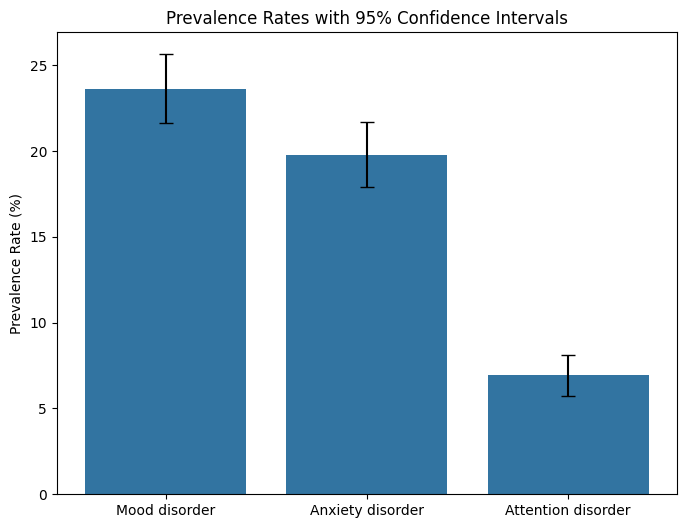

In [898]:
# setting mental conditions array
conditions = ["Mood disorder", "Anxiety disorder", "Attention disorder"]

# calculating prevalence rate for each mental conditions
mood_disorder_rate = (mental_condition.iloc[1, 1] / total_population) * 100
anxiety_disorder_rate = (mental_condition.iloc[2, 1] / total_population) * 100
attention_disorder_rate = (mental_condition.iloc[3, 1] / total_population) * 100

# creating prevalence rate array
prevalence_rates = [mood_disorder_rate, anxiety_disorder_rate, attention_disorder_rate]

# print prevalence rate values
print(
    "Mood disorder prevalence rate: %.2f\nAnxiety disorder rate: %.2f\nAttention disorder rate: %.2f"
    % (mood_disorder_rate, anxiety_disorder_rate, attention_disorder_rate)
)

# calculating confidence interval for each mental condition, z-factor for 95%
z = 1.96
conf_interval_mood = (
    z
    * np.sqrt(
        (mood_disorder_rate / 100) * (1 - mood_disorder_rate / 100) / total_population
    )
    * 100
)

conf_interval_anxiety = (
    z
    * np.sqrt(
        (anxiety_disorder_rate / 100)
        * (1 - anxiety_disorder_rate / 100)
        / total_population
    )
    * 100
)

conf_interval_attention = (
    z
    * np.sqrt(
        (attention_disorder_rate / 100)
        * (1 - attention_disorder_rate / 100)
        / total_population
    )
    * 100
)

conf_intervals = [conf_interval_mood, conf_interval_anxiety, conf_interval_attention]

# setting plot
plt.figure(figsize=(8, 6))

# plot barplot
sns.barplot(x=conditions, y=prevalence_rates)

# plot errorbar on the plot
plt.errorbar(
    conditions,
    prevalence_rates,
    yerr=conf_intervals,
    fmt="none",
    capsize=5,
    color="black",
)

# setting labels
plt.ylabel("Prevalence Rate (%)")
plt.title("Prevalence Rates with 95% Confidence Intervals")
plt.show()

<font size = "4">Conclusion

<font size = "2">The dataset provides a vast amount of information that can be analyzed in various ways to yield valuable insights. Depending on the stakeholders' objectives, it is possible to compile a comprehensive summary regarding the working experiences of individuals affected by mental health conditions within the IT industry.

In this analysis, we have drawn significant results related to the sample population, highlighting key features and the frequency of mental health conditions reported. However, we acknowledge that the extensive data collected holds substantial potential for more in-depth analyses tailored to specific stakeholder needs.

For the sake of improvement, several critical points have been identified concerning this dataset, particularly regarding bias in the data. Additionally, the structure of the dataset is not always clear, with some redundant questions and answers that can be challenging to interpret.

As a recommendation for improvement, we suggest restructuring the questionnaire to follow a more linear format and limiting the number of response options. Such changes could enhance clarity, reduce confusion, and facilitate more accurate data collection in future surveys.

By addressing these issues, we can unlock the full potential of the dataset, leading to more robust analyses and actionable insights that support mental health initiatives within the IT industry.

